# Save the Factory: Feature Engineering Challenge

<img src="https://drive.google.com/uc?id=1QjV8Th9fOK89MhgV-Y1Irn7dTl7ZheP0" width="650">

## Background

In the whimsical town of Widgetville, the mighty Widget Corp stands as the centerpiece, crafting widgets of unmatched quality with a **Ruby** and **Sapphire** magic stones inside. But recently, a trickster sprite seems to have infiltrated the assembly lines, introducing problems and faults to widgets's working procedure and labels. As the company’s freshly appointed Chief Engineering Detective, you are tasked with a mission to unravel this puzzling situation.

## Task

- Your ultimate goal is to effectively classify widgets into two classes: **Ruby** and **Sapphire**.

- You have recovered the labels for a previous month's supply of widgets, and should use these to classify the remaining widgets.

- For every widget, you have an access to the so-called "The Pulse of the Machine" -- a unique numerical representation of each widget, which features 8 magic threads (represented by 187 numbers) woven into the central timeless crystal.
Therefore, each widget is described by (187 x 8) array. You must use these data to recover the **Ruby** and **Sapphire** labels.

- You need to engineer discerning features from the **Pulse of the Machine**, since efficient factory procedures allow you to **only use Decision Tree Classifier** with a limited tree depth as a model, with no hyperparameters change allowed.
  - You can read more about Decision Trees in scikit-learn documentation:
    - https://en.wikipedia.org/wiki/Decision_tree
    - https://scikit-learn.org/stable/modules/tree.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  
- You have two levels of difficulty, producing **Efficient** and **Super Duper Efficient** solutions. These vary by the allowed tree depth.

- Your classification success will be measured by the ROC AUC metric
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- Your solution for each task should not exceed 5 minutes for training from scratch **AND** inference on the validation/test set on the standard Colab non-GPU instance. This **INCLUDES** features generation (working time of the function that transforms initial Pulse of the Machine into a set of features for the model).

## Deliverables

- We will share the test data 48 hours before the deadline

- Use test data to create `efficient_test_predictions.txt` and `super_duper_efficient_test_predictions.txt` and share these files with us

- Also share this notebook containing your solution so we can reproduce your results and check the time constraints

## Tips
- Aim to create a minimal yet mighty set of derivative features to maintain the elegance and effectiveness of your tools.
- The crystals are indeed **timeless** -- be aware that there are no time series involved.
- There was a rumor that not only labels, but the data itself was corrupted by evil spirits. Is there a way for a possible recovery?
- Ensure your solutions are as clear as the crystal waters of Widgetville’s famed springs by providing them with sufficient documentation.

# Below goes data loading and visualization

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
!gdown 1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA

Downloading...
From (original): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA
From (redirected): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA&confirm=t&uuid=47f2aedd-0d8d-474e-9316-fd31575f9291
To: /content/FE_hometask_data_v3.pickle
100% 260M/260M [00:05<00:00, 45.3MB/s]


In [ ]:
data = pd.read_pickle('FE_hometask_data_v3.pickle')
for key in data.keys():
  print(key)

train
val


In [ ]:
X_train = np.array([x[0] for x in data['train'].values()])
y_train = np.array([x[1] for x in data['train'].values()])

X_val = np.array([x[0] for x in data['val'].values()])
y_val = np.array([x[1] for x in data['val'].values()])
# this is temporary as we'll share the test data later
X_test = X_val

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((20240, 187, 8), (20240,), (1456, 187, 8), (1456,), (1456, 187, 8))

In [ ]:
def vis(arr, color='r'):
  widget_type = 'Ruby' if color == 'r' else 'Sapphire'
  plt.figure(figsize=(12, 8))
  for cnt in range(8):
    plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

In [ ]:
y_train[0], y_train[2]

(True, False)

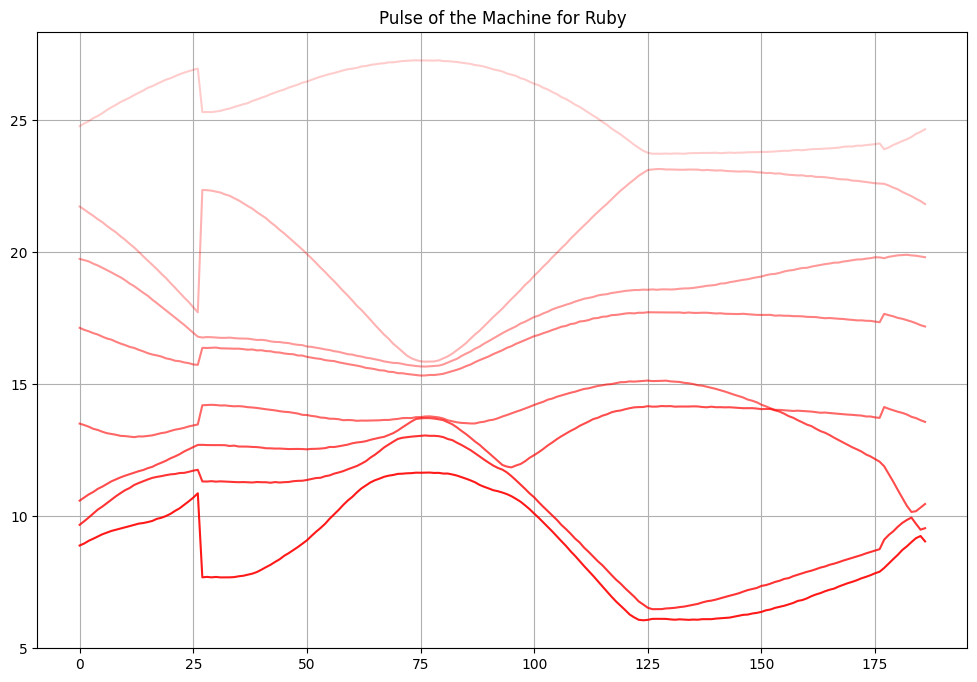

In [ ]:
vis(X_train[0], 'r')

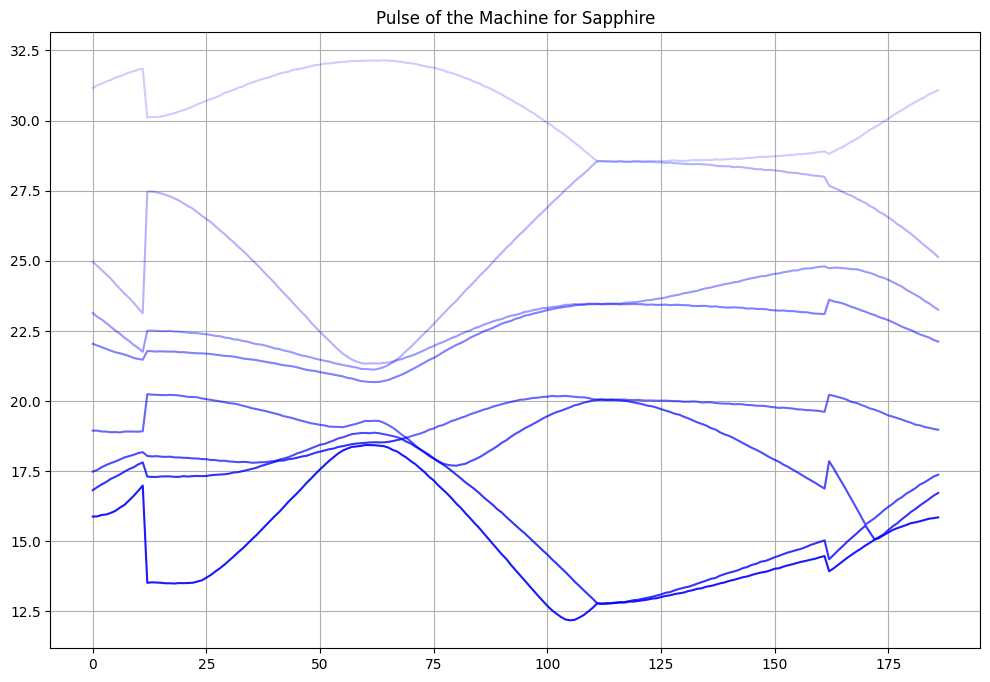

In [ ]:
vis(X_train[2], 'b')

# Functions to evaluate the results
N.B. Do not change it!

In [ ]:
def efficient_eval(train_features, val_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

def super_duper_efficient_eval(train_features, val_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

# Functions to write answers to files

Don't change the functions, share the files with us in your final submission.

In [ ]:
def efficient_test_predictions(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

def super_duper_efficient_test_predictions(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('super_duper_efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

# Baselines: let's try some simple feature sets!
- every 10th element of a flattened array
- mean value / standard deviation by each axis

In [ ]:
def feature_set_10th(X):
  return np.reshape(X, (X.shape[0], -1))[:, ::10]

def feature_set_mean(X, axis=1):
  return np.mean(X, axis=axis)

def feature_set_std(X, axis=1):
  return np.std(X, axis=axis)

In [ ]:
%%time
efficient_eval(
    feature_set_10th(X_train),
    feature_set_10th(X_val)
)

CPU times: user 15.5 s, sys: 48.5 ms, total: 15.6 s
Wall time: 25.4 s


0.5001700018954235

In [ ]:
%%time
super_duper_efficient_eval(
    feature_set_10th(X_train),
    feature_set_10th(X_val)
)

CPU times: user 2.95 s, sys: 4.71 ms, total: 2.95 s
Wall time: 2.96 s


0.5033726812816189

In [ ]:
%%time
efficient_eval(
    feature_set_mean(X_train, axis=2),
    feature_set_mean(X_val, axis=2)
)

CPU times: user 20 s, sys: 47 ms, total: 20.1 s
Wall time: 20.2 s


0.5015876613796728

In [ ]:
%%time
efficient_eval(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_val, axis=2)
)

CPU times: user 10.7 s, sys: 95.8 ms, total: 10.8 s
Wall time: 10.9 s


0.6392012646577783

In [ ]:
%%time
super_duper_efficient_eval(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_val, axis=2)
)

CPU times: user 3.48 s, sys: 79.9 ms, total: 3.56 s
Wall time: 3.55 s


0.6041085745438772

Ok, for some reason `feature_set_std, axis=2` was the best.

Don't forget to share the files with us, and please note: any function below (`efficient_test_predictions`, `super_duper_efficient_test_predictions`) should meet the five-minute time limit constraint.

That's how one produces results for the test set.



In [ ]:
efficient_test_predictions(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_test, axis=2)
)

In [ ]:
super_duper_efficient_test_predictions(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_test, axis=2)
)

# Now it's your turn to try!

This file contains our full solving process for only the final solution please look into [IOAI 2024: ML Problem - solution](https://colab.research.google.com/drive/1XalZZgNn6p-h0eKJZctieiDePfoVYvPc?authuser=2#scrollTo=QWgclL2Ej1QT).

First lets define some useful functions that can help us in finding the best solution:

In [ ]:
# some more simple feature sets

def feature_set_median(X, axis=1):
  return np.median(X, axis=axis)

def feature_set_all(X):
  return X.reshape(X.shape[0],-1)

def feature_set_nth(X, n):
  return np.reshape(X, (X.shape[0], -1))[:, ::n]

In [ ]:
def try_all(X_train_changed, X_val_changed):
  print("Efficient:")
  print("10th",efficient_eval(
      feature_set_10th(X_train_changed),
      feature_set_10th(X_val_changed)
  ))
  print("mean 1",efficient_eval(
      feature_set_mean(X_train_changed,1),
      feature_set_mean(X_val_changed,1)
  ))
  print("mean 2",efficient_eval(
      feature_set_mean(X_train_changed,2),
      feature_set_mean(X_val_changed,2)
  ))
  print("std 1",efficient_eval(
      feature_set_std(X_train_changed,1),
      feature_set_std(X_val_changed,1)
  ))
  print("std 2",efficient_eval(
      feature_set_std(X_train_changed,2),
      feature_set_std(X_val_changed,2)
  ))
  print("median 1",efficient_eval(
      feature_set_median(X_train_changed,1),
      feature_set_median(X_val_changed,1)
  ))
  print("median 2",efficient_eval(
      feature_set_median(X_train_changed,2),
      feature_set_median(X_val_changed,2)
  ))
  print("Super Duper Efficient:")
  print("10th",super_duper_efficient_eval(
      feature_set_10th(X_train_changed),
      feature_set_10th(X_val_changed)
  ))
  print("mean 1",super_duper_efficient_eval(
      feature_set_mean(X_train_changed,1),
      feature_set_mean(X_val_changed,1)
  ))
  print("mean 2",super_duper_efficient_eval(
      feature_set_mean(X_train_changed,2),
      feature_set_mean(X_val_changed,2)
  ))
  print("std 1",super_duper_efficient_eval(
      feature_set_std(X_train_changed,1),
      feature_set_std(X_val_changed,1)
  ))
  print("std 2",super_duper_efficient_eval(
      feature_set_std(X_train_changed,2),
      feature_set_std(X_val_changed,2)
  ))
  print("median 1",super_duper_efficient_eval(
      feature_set_median(X_train_changed,1),
      feature_set_median(X_val_changed,1)
  ))
  print("median 2",super_duper_efficient_eval(
      feature_set_median(X_train_changed,2),
      feature_set_median(X_val_changed,2)
  ))

In [ ]:
# function for visualizing multiple widgets on same graph

import random as r

def multy_vis(arrs, color='r'):
  widget_type = 'Ruby' if color == 'r' else 'Sapphire'
  plt.figure(figsize=(9, 5))
  for arr in arrs:
    for cnt in range(8):
      plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

def multy_vis_col(arrs, type='r'):#colorful version
  widget_type = 'Ruby' if type == 'r' else 'Sapphire'
  plt.figure(figsize=(9, 5))
  for arr in arrs:
    if type=='r':
      color="#FF"+hex(r.randint(0,50))[2:].ljust(2,'0')+hex(r.randint(0,50))[2:].ljust(2,'0')
    else:
      color="#"+hex(r.randint(0,50))[2:].ljust(2,'0')+hex(r.randint(0,50))[2:].ljust(2,'0')+"FF"
    for cnt in range(8):
      plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

def vis_all():
  rubys=[]
  sapphires=[]
  for i in range(20240):
      if (y_train[i]==True): # ruby
          rubys.append(X_train[i])
      else: # sapphire
          sapphires.append(X_train[i])

  multy_vis(rubys, 'r')
  multy_vis(sapphires, 'b')

def vis_all_changed(cpy):
  rubys=[]
  sapphires=[]
  for i in range(20240):
      if (y_train[i]==True): # ruby
          rubys.append(cpy[i])
      else: # sapphire
          sapphires.append(cpy[i])

  multy_vis(rubys, 'r')
  multy_vis(sapphires, 'b')

Now that we have defined all the functions we need, we can finally start solving the problem. Let's first look at all the data we have to understand what we can try to do.

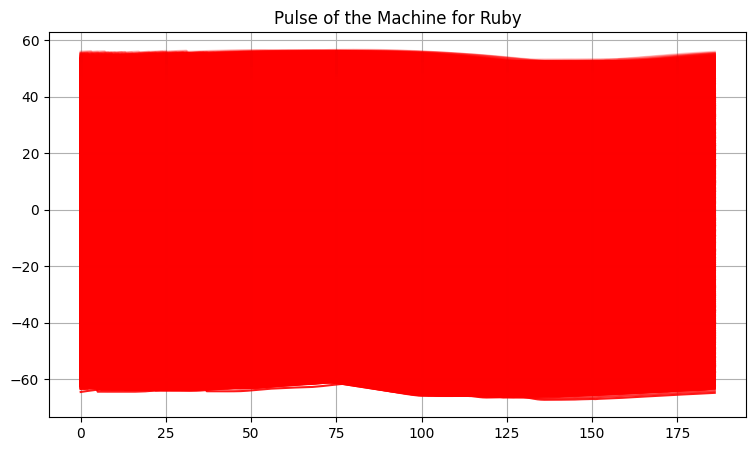

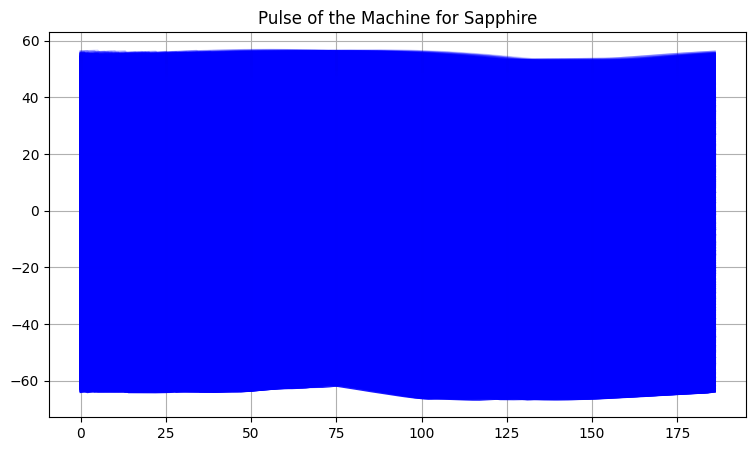

In [ ]:
vis_all()

True True False True False False


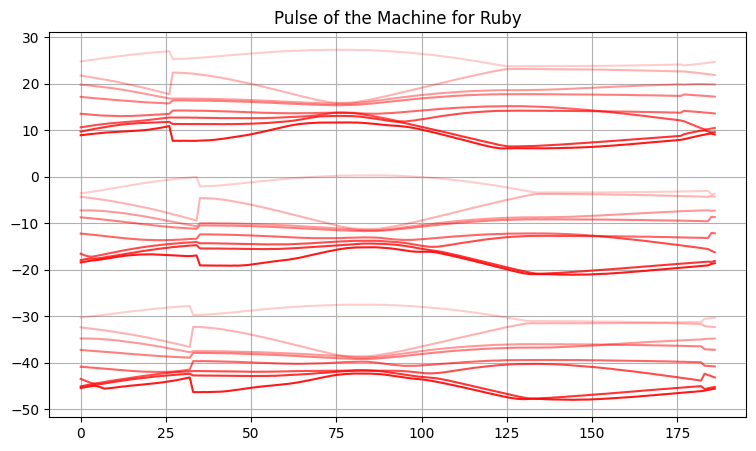

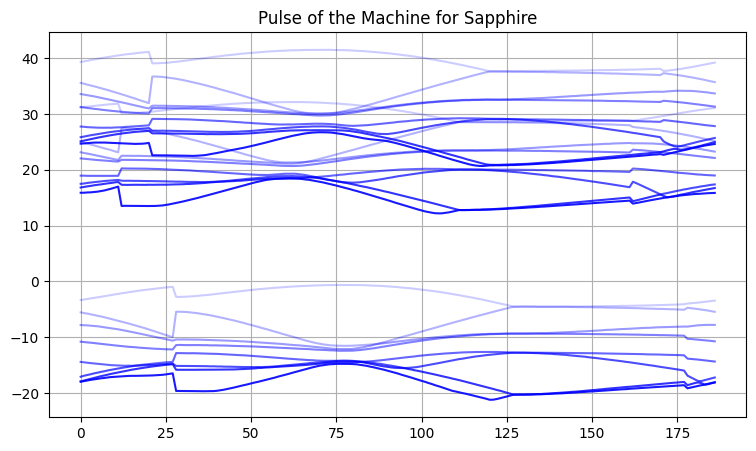

In [ ]:
print(y_train[0],y_train[1],y_train[2],y_train[3],y_train[4],y_train[5])
multy_vis([X_train[0], X_train[1], X_train[3]], 'r')
multy_vis([X_train[2], X_train[4], X_train[5]], 'b')

Based on the graphics we can see one big difference in the pulses: they are at different heights in the graph. Let's try to normalize this by subtracting some value from all the numbers in the same pulse.

In [ ]:
def feature_set_normalize_mean(X):
  X=X.copy()
  for i in range(X.shape[0]):
    X[i]=X[i]-np.mean(X[i])
  return X

def feature_set_normalize_max(X):
  X=X.copy()
  for i in range(X.shape[0]):
    X[i]=X[i]-np.max(X[i])
  return X

def feature_set_normalize_median(X):
  X=X.copy()
  for i in range(X.shape[0]):
    X[i]=X[i]-np.median(X[i])
  return X

In [ ]:
print("mean:")
try_all(feature_set_normalize_mean(X_train),feature_set_normalize_mean(X_val))
print("max:")
try_all(feature_set_normalize_max(X_train),feature_set_normalize_max(X_val))
print("median:")
try_all(feature_set_normalize_median(X_train),feature_set_normalize_median(X_val))

mean:
Efficient:
10th 0.8404063240705099
mean 1 0.8193837333588663
mean 2 0.6811282263721792
std 1 0.8326673297391936
std 2 0.6392012646577783
median 1 0.7901981205997355
median 2 0.8160677193757218
Super Duper Efficient:
10th 0.7394847965546282
mean 1 0.7108883282951545
mean 2 0.6316918705875226
std 1 0.6848584978476195
std 2 0.6041085745438772
median 1 0.739410542853179
median 2 0.7180010512760889
max:
Efficient:
10th 0.8256015038328588
mean 1 0.816595311464967
mean 2 0.6693853942969249
std 1 0.8326673297391936
std 2 0.6392012646577783
median 1 0.7910412909201401
median 2 0.7494670342876236
Super Duper Efficient:
10th 0.6945476288643677
mean 1 0.639948686784209
mean 2 0.6094782895855276
std 1 0.6848584978476195
std 2 0.6041085745438772
median 1 0.6813060444467024
median 2 0.5927360339534821
median:
Efficient:
10th 0.8835535867468868
mean 1 0.8315554782622289
mean 2 0.7674891892472824
std 1 0.8326673297391936
std 2 0.6392012646577783
median 1 0.7984178099456971
median 2 0.821856577021

Nice! We just got much better results than the examples had. Let's now look at the changed data to see what we are gonna do next.

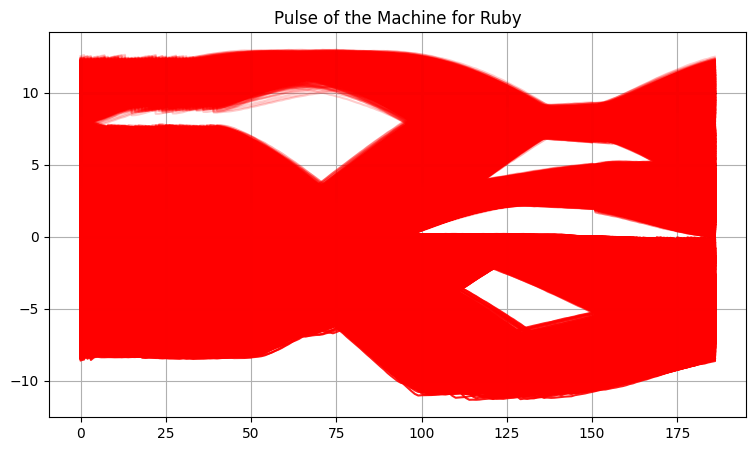

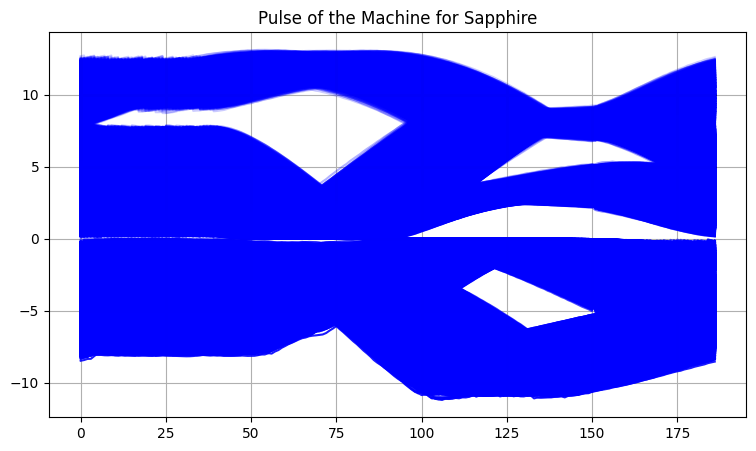

In [ ]:
vis_all_changed(feature_set_normalize_median(X_train))

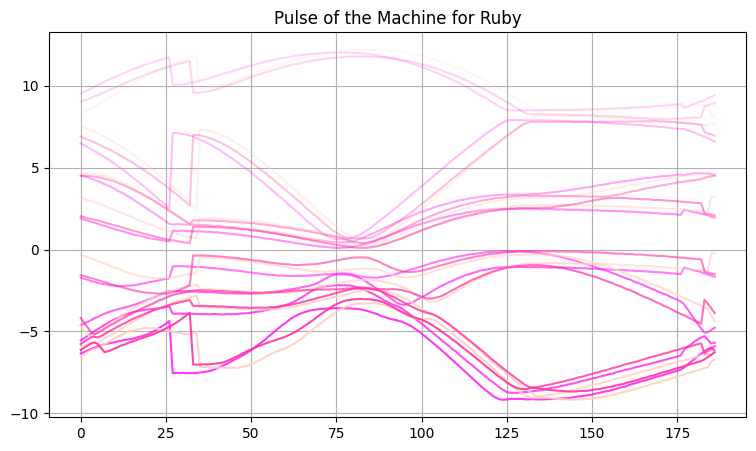

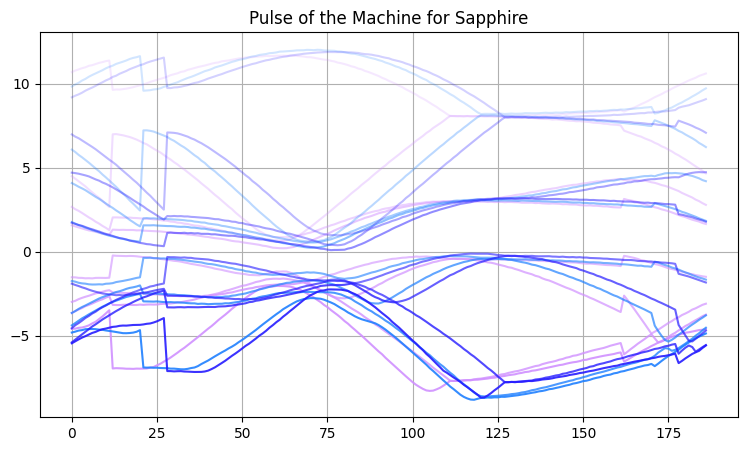

In [ ]:
cpy=feature_set_normalize_median(X_train)
multy_vis_col([cpy[0], cpy[1], cpy[3]], 'r')
multy_vis_col([cpy[2], cpy[4], cpy[5]], 'b')

Based on the previous graphs we can now see that pulses are almost identical but "moved" to the left or right. From here on we have 2 different solutions that use different techniques to remove the shift.

**Solution 1:** Sort every thread in non-decreasing order and multiply every number by some constant so that all pulses have the same range of numbers.

In [ ]:
def feature_set_normalize(X):
  X=X.copy()
  for i in range(X.shape[0]):
    X[i]=X[i]-np.median(X[i])
    X[i]=X[i]*(10/max(abs(np.max(X[i])),abs(np.min(X[i]))))
    X[i]=np.sort(X[i],axis=0)
  return X

In [ ]:
try_all(feature_set_normalize(X_train),feature_set_normalize(X_val))

Efficient:
10th 0.9534751709300666
mean 1 0.8682827268304025
mean 2 0.8014749129961564
std 1 0.8540054986819968
std 2 0.8061099072024136
median 1 0.8218145650589438
median 2 0.8890933036839606
Super Duper Efficient:
10th 0.914953132236072
mean 1 0.7696366844549876
mean 2 0.7574747097754997
std 1 0.732527420133305
std 2 0.7346573289380351
median 1 0.7478793729079508
median 2 0.7765373935778365


**Solution 2:** "Untiming" the pulses (Yes, it works, even tho the task statement says "The crystals are indeed timeless -- be aware that there are no time series involved.").

In [ ]:
def feature_set_normalize_untime(X):
  X=X.copy()
  for i in range(X.shape[0]):
    X[i]=X[i]-np.median(X[i])
  return untime(X)

def untime(X):
  X = X.copy()
  for i in range(X.shape[0]):
    x = X[i]
    change = ((x-np.roll(x, 1, 0))**2).sum(axis=1)
    jump_pos = change.argmax()
    x = np.roll(x, -jump_pos, 0)
    X[i] = x
  return X

In [ ]:
try_all(feature_set_normalize_untime(X_train),feature_set_normalize_untime(X_val))

Efficient:
10th 0.9539509808327749
mean 1 0.8315554782622289
mean 2 0.8645426851310872
std 1 0.8326673297391936
std 2 0.8274011790706173
median 1 0.7984178099456971
median 2 0.9286089741460336
Super Duper Efficient:
10th 0.8599350475516796
mean 1 0.7759580193020543
mean 2 0.7598713456920152
std 1 0.6848584978476195
std 2 0.6747453391147005
median 1 0.7211763740354347
median 2 0.8701713111054228


Now we have 2 normalizers that give pretty good results, so let's try different feature sets to get even better results.
Some of the feature sets were already tried in the try_all function, but there are some more that are defined but haven't been tried yet.

In [ ]:
print("normalize:")
print("efficient:",efficient_eval(
    feature_set_all(feature_set_normalize(X_train)),
    feature_set_all(feature_set_normalize(X_val))
))
print("super duper efficient:",super_duper_efficient_eval(
    feature_set_all(feature_set_normalize(X_train)),
    feature_set_all(feature_set_normalize(X_val))
))
print("normalize untime:")
print("efficient:",efficient_eval(
    feature_set_all(feature_set_normalize_untime(X_train)),
    feature_set_all(feature_set_normalize_untime(X_val))
))
print("super duper efficient:",super_duper_efficient_eval(
    feature_set_all(feature_set_normalize_untime(X_train)),
    feature_set_all(feature_set_normalize_untime(X_val))
))

normalize:
efficient: 0.9730752170455235
super duper efficient: 0.941034744870144
normalize untime:
efficient: 0.9614828464179429
super duper efficient: 0.9415105547728521


In [ ]:
for n in range(2,10):
  print("n: ",n)
  print("normalize:")
  print("efficient:",efficient_eval(
      feature_set_nth(feature_set_normalize(X_train),n),
      feature_set_nth(feature_set_normalize(X_val),n)
  ))
  print("super duper efficient:",super_duper_efficient_eval(
      feature_set_nth(feature_set_normalize(X_train),n),
      feature_set_nth(feature_set_normalize(X_val),n)
  ))
  print("normalize untime:")
  print("efficient:",efficient_eval(
      feature_set_nth(feature_set_normalize_untime(X_train),n),
      feature_set_nth(feature_set_normalize_untime(X_val),n)
  ))
  print("super duper efficient:",super_duper_efficient_eval(
      feature_set_nth(feature_set_normalize_untime(X_train),n),
      feature_set_nth(feature_set_normalize_untime(X_val),n)
  ))

n:  2
normalize:
efficient: 0.9543183412504714
super duper efficient: 0.9199085897854264
normalize untime:
efficient: 0.9492593193280432
super duper efficient: 0.88644557301386
n:  3
normalize:
efficient: 0.964384602908791
super duper efficient: 0.9384534517223928
normalize untime:
efficient: 0.9661745079226746
super duper efficient: 0.9448832360544709
n:  4
normalize:
efficient: 0.9368804456785323
super duper efficient: 0.9018346526392306
normalize untime:
efficient: 0.9577945869051643
super duper efficient: 0.88644557301386
n:  5
normalize:
efficient: 0.9538991986462378
super duper efficient: 0.9291785781979409
normalize untime:
efficient: 0.9679644129365581
super duper efficient: 0.9426175211378793
n:  6
normalize:
efficient: 0.9516334837296462
super duper efficient: 0.9236486314847419
normalize untime:
efficient: 0.9536354026016153
super duper efficient: 0.9004316484907935
n:  7
normalize:
efficient: 0.9591135671282772
super duper efficient: 0.9370826893127427
normalize untime:
eff

The best results that we managet to get:

*   **efficient:** 0.9730752170455235 (feature set normalize + feature set all)
*   **super duper efficient:** 0.9448832360544709 (feature set normalize untime + feature set 3rd)

# UPDATE: the test data!

- Generate test predictions using your functions
- Download your files (use `Files` icon on the left sidebar)
- Upload them somewhere and share the link
- Don't forget to share this notebook as well!

In [ ]:
!gdown 1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd

Downloading...
From: https://drive.google.com/uc?id=1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd
To: /content/FE_hometask_data_v3_test.pickle
100% 24.3M/24.3M [00:00<00:00, 126MB/s] 


In [ ]:
test_data = pd.read_pickle('FE_hometask_data_v3_test.pickle')
X_test = np.array([x[0] for x in test_data['test'].values()])
X_test.shape

(2024, 187, 8)

In [ ]:
# your solution! replace it
your_feature_set_efficient = lambda X: feature_set_all(feature_set_normalize(X))
your_feature_set_super_duper_efficient = lambda X: feature_set_nth(feature_set_normalize_untime(X),3)

efficient_test_predictions(
    your_feature_set_efficient(X_train),
    your_feature_set_efficient(X_test)
)

super_duper_efficient_test_predictions(
    your_feature_set_super_duper_efficient(X_train),
    your_feature_set_super_duper_efficient(X_test)
)

We have finally received test data, so we can run some final tests before submitting the solution.

First lets check time that model takes for training and evaluation.

In [ ]:
import time

def efficient_time_test(train_features, test_features, y_train=y_train):
  print("efficient model")
  print("started model training...")
  start = time.time()
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  print(f"model trained in {time.time()-start} seconds")
  print("started model evaluation...")
  start = time.time()
  preds = model.predict(test_features)
  print(f"model evaluated in {time.time()-start} seconds")

def super_duper_efficient_time_test(train_features, test_features, y_train=y_train):
  print("super duper efficient model")
  print("started model training...")
  start = time.time()
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  print(f"model trained in {time.time()-start} seconds")
  print("started model evaluation...")
  start = time.time()
  preds = model.predict(test_features)
  print(f"model evaluated in {time.time()-start} seconds")

In [ ]:
efficient_time_test(
    your_feature_set_efficient(X_train),
    your_feature_set_efficient(X_test)
)

efficient model
started model training...
model trained in 100.05559778213501 seconds
started model evaluation...
model evaluated in 0.011664628982543945 seconds


In [ ]:
super_duper_efficient_time_test(
    your_feature_set_super_duper_efficient(X_train),
    your_feature_set_super_duper_efficient(X_test)
)

efficient model
started model training...
model trained in 8.406224489212036 seconds
started model evaluation...
model evaluated in 0.004030466079711914 seconds


Everything is fine. Next, let's check how similar the test and train sets look on the graph at different stages.

In [ ]:
# first generate y_test
def get_y_test(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = [True if x else False
           for x in model.predict(test_features)]
  return preds

In [ ]:
y_test=get_y_test(
    your_feature_set_efficient(X_train),
    your_feature_set_efficient(X_test)
)

In [ ]:
# we also need to define some more functions
def vis_all_test():
  rubys=[]
  sapphires=[]
  for i in range(2024):
      if (y_test[i]==True): # ruby
          rubys.append(X_test[i])
      else: # sapphire
          sapphires.append(X_test[i])

  multy_vis(rubys, 'r')
  multy_vis(sapphires, 'b')

def vis_all_changed_test(cpy):
  rubys=[]
  sapphires=[]
  for i in range(2024):
      if (y_test[i]==True): # ruby
          rubys.append(cpy[i])
      else: # sapphire
          sapphires.append(cpy[i])

  multy_vis(rubys, 'r')
  multy_vis(sapphires, 'b')

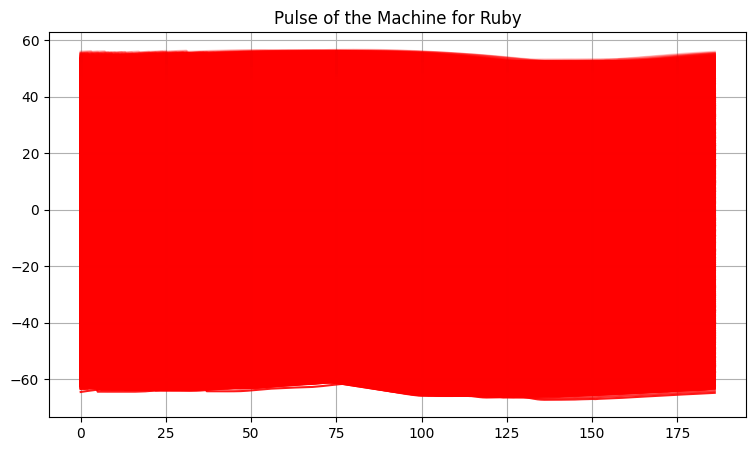

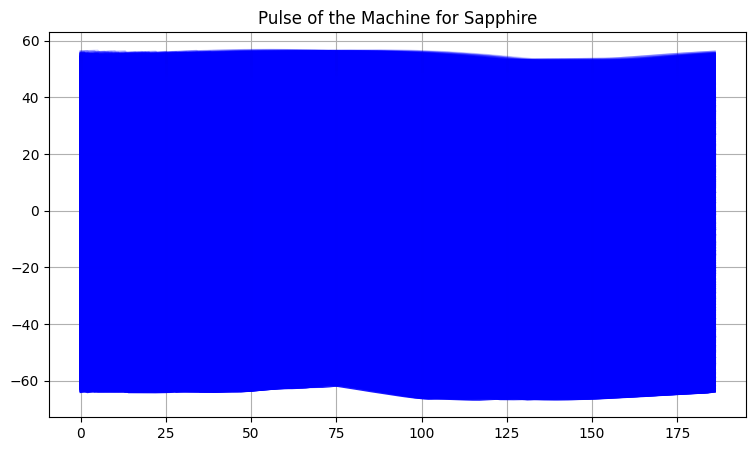

In [ ]:
vis_all()

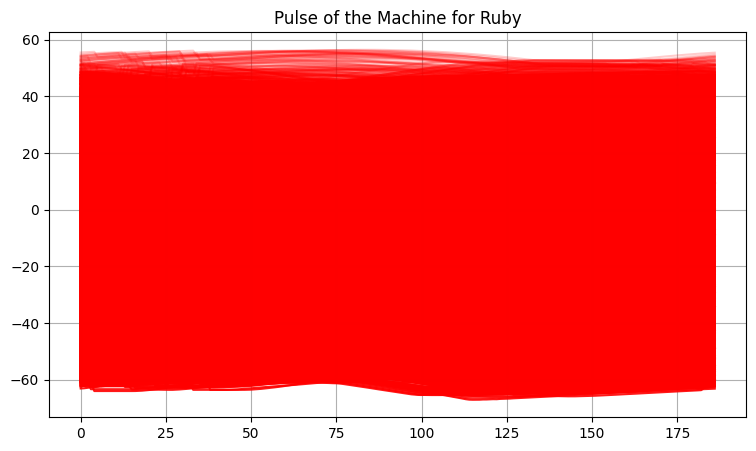

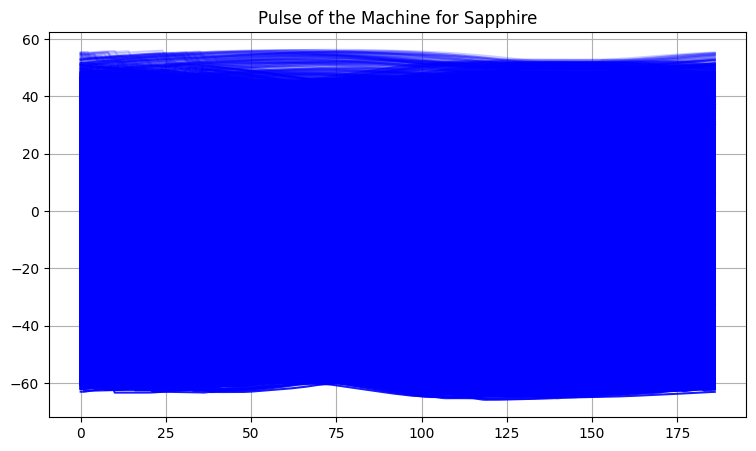

In [ ]:
vis_all_test()

True True False True False False


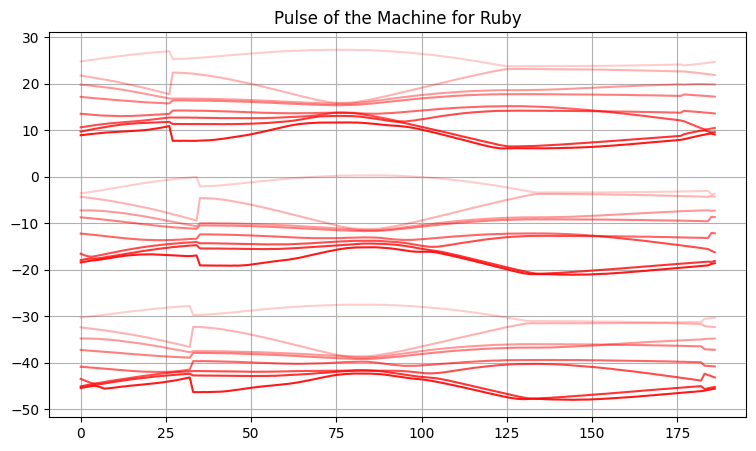

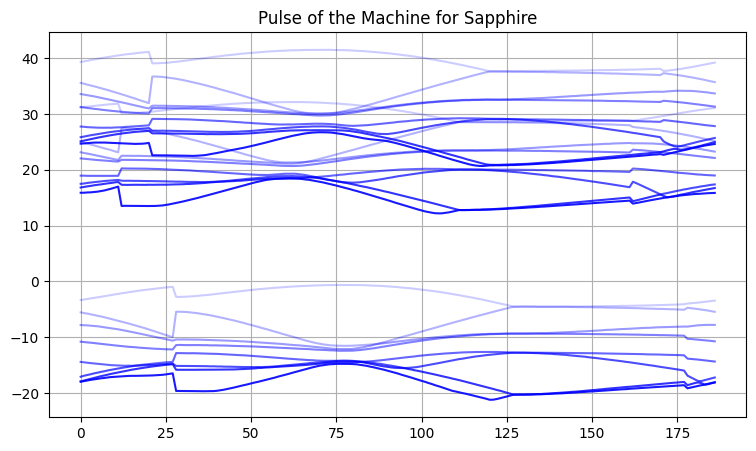

In [ ]:
print(y_train[0],y_train[1],y_train[2],y_train[3],y_train[4],y_train[5])
multy_vis([X_train[0], X_train[1], X_train[3]], 'r')
multy_vis([X_train[2], X_train[4], X_train[5]], 'b')

False False True True False True


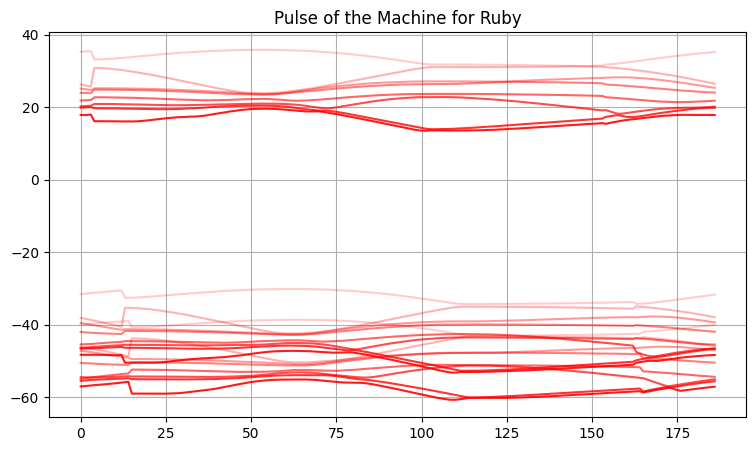

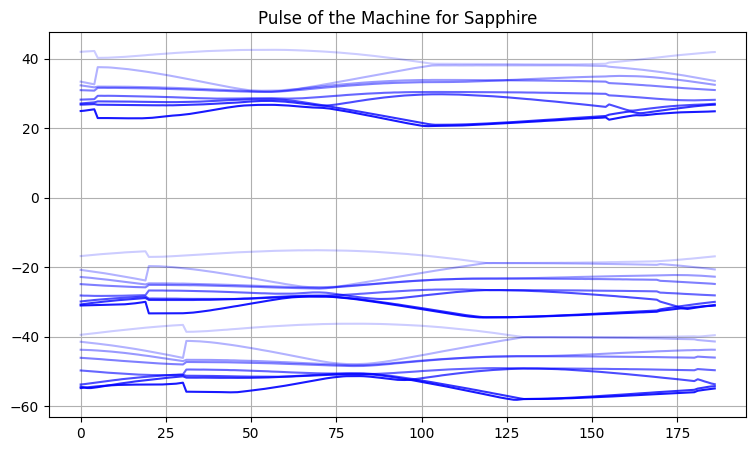

In [ ]:
print(y_test[0],y_test[1],y_test[2],y_test[3],y_test[4],y_test[7])
multy_vis([X_test[2], X_test[3], X_test[7]], 'r')
multy_vis([X_test[0], X_test[1], X_test[4]], 'b')

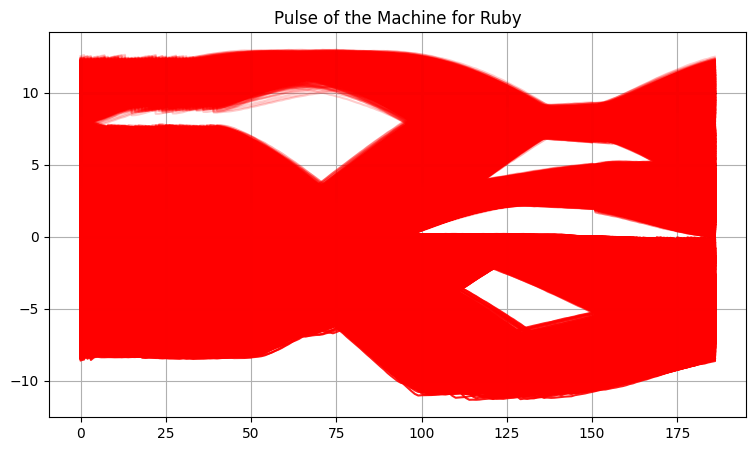

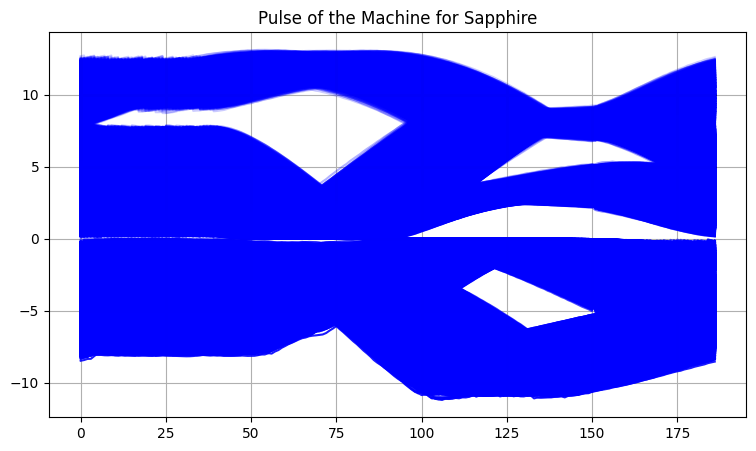

In [ ]:
vis_all_changed(feature_set_normalize_median(X_train))

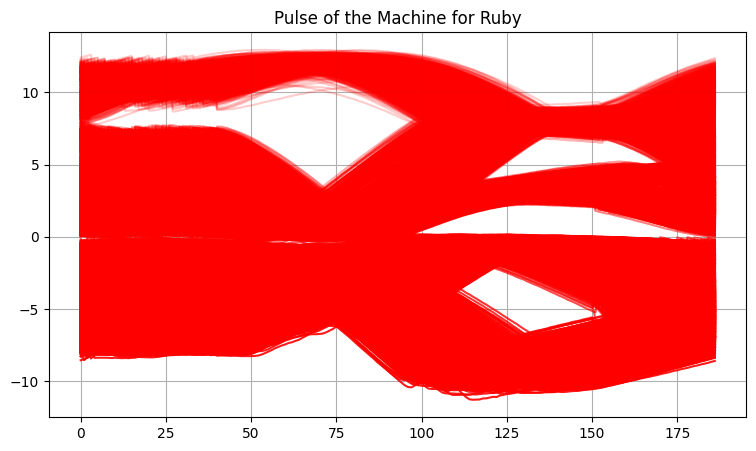

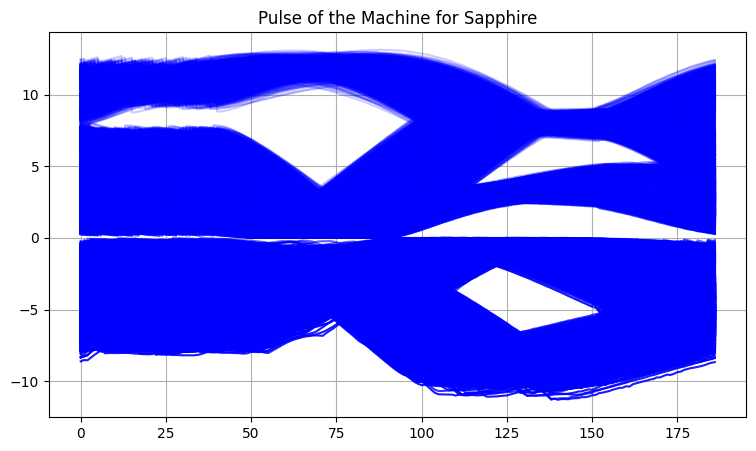

In [ ]:
vis_all_changed_test(feature_set_normalize_median(X_test))

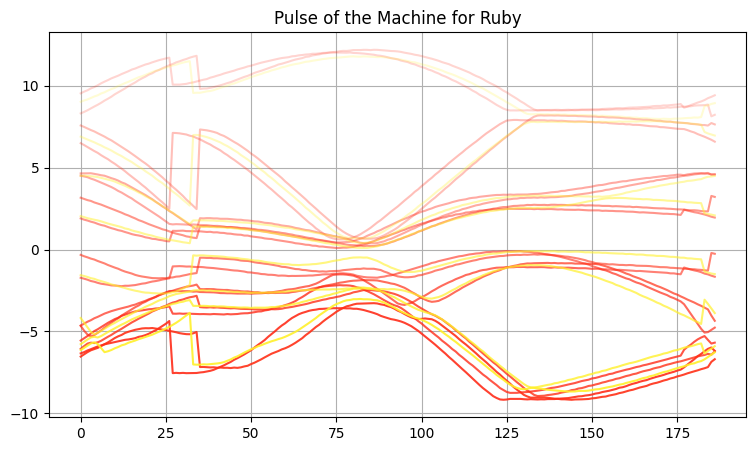

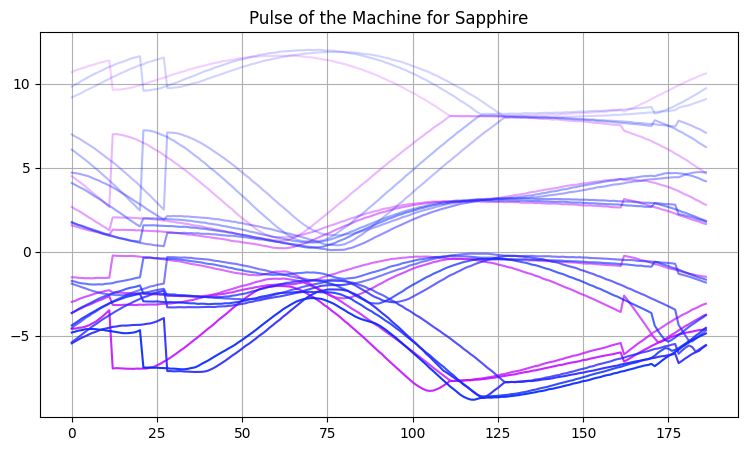

In [ ]:
cpy=feature_set_normalize_median(X_train)
multy_vis_col([cpy[0], cpy[1], cpy[3]], 'r')
multy_vis_col([cpy[2], cpy[4], cpy[5]], 'b')

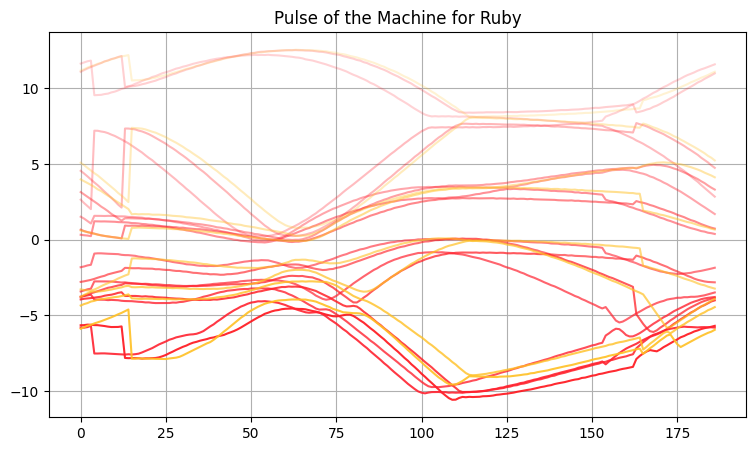

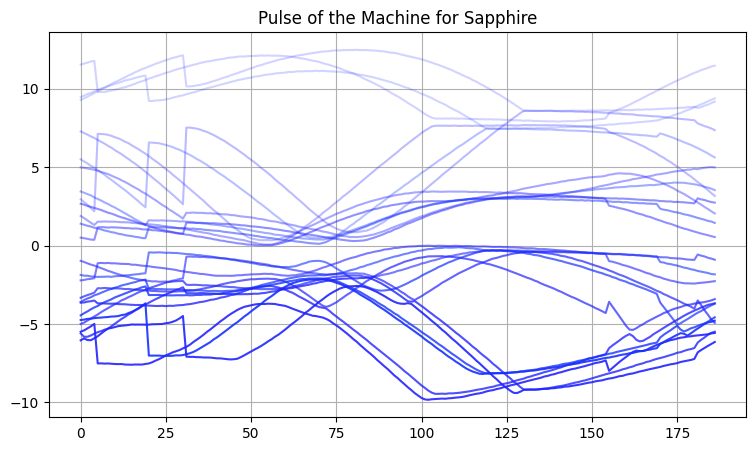

In [ ]:
cpy=feature_set_normalize_median(X_test)
multy_vis_col([cpy[2], cpy[3], cpy[7]], 'r')
multy_vis_col([cpy[0], cpy[1], cpy[4]], 'b')

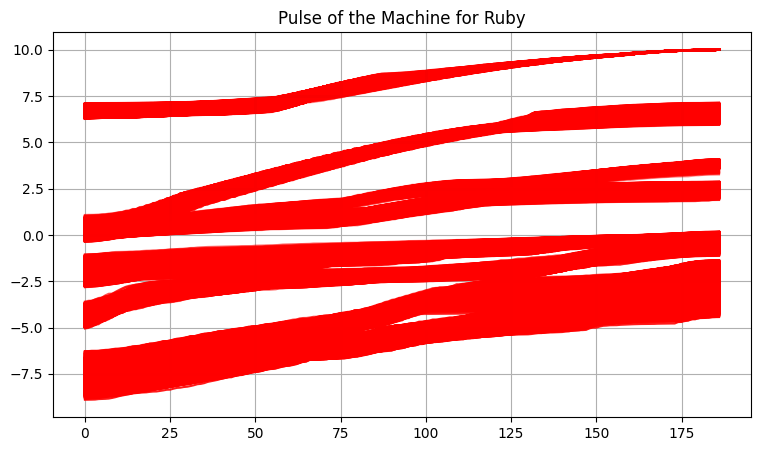

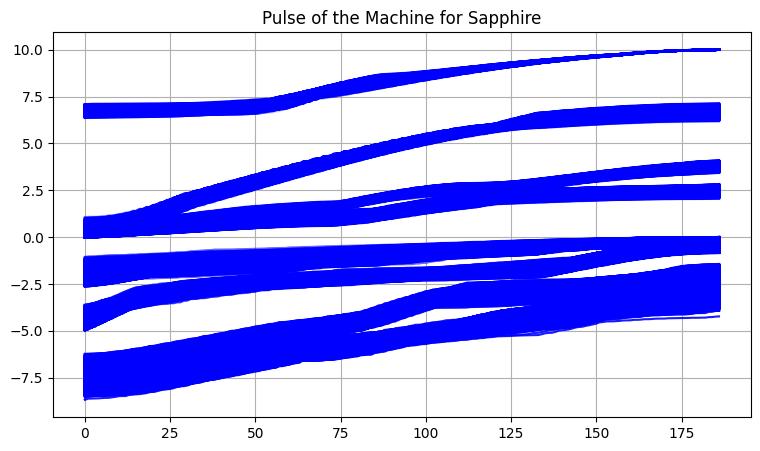

In [ ]:
cpy=feature_set_normalize(X_train)
vis_all_changed(cpy)

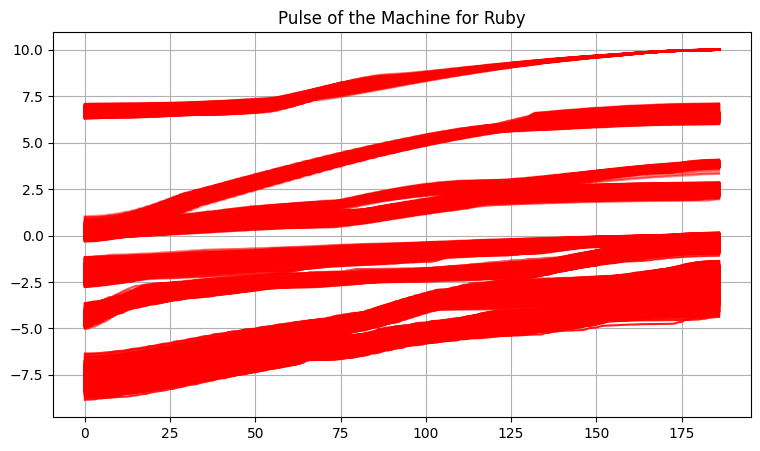

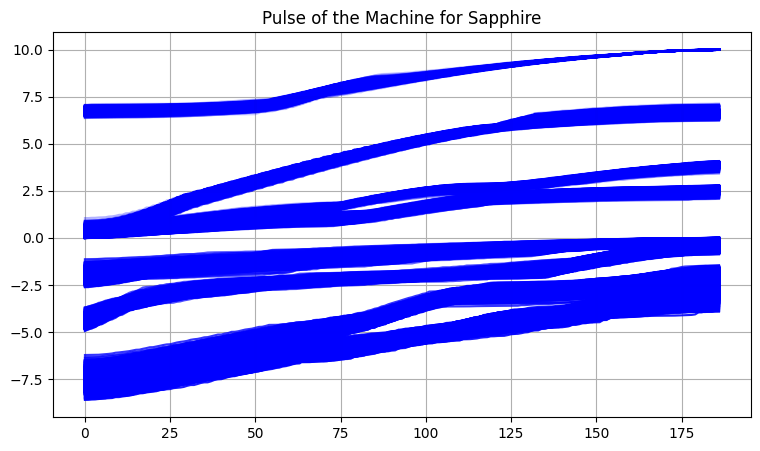

In [ ]:
cpy=feature_set_normalize(X_test)
vis_all_changed_test(cpy)

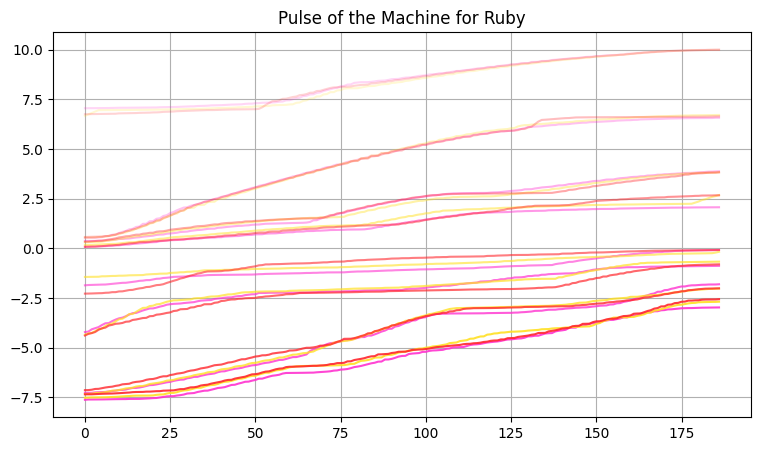

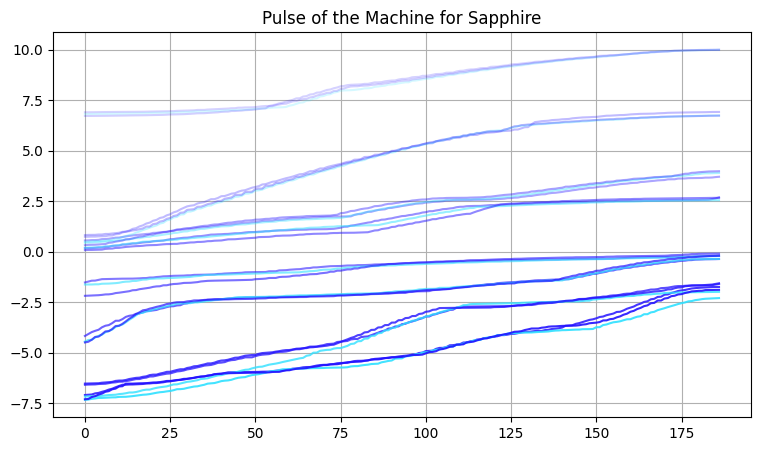

In [ ]:
cpy=feature_set_normalize(X_train)
multy_vis_col([cpy[0], cpy[1], cpy[3]], 'r')
multy_vis_col([cpy[2], cpy[4], cpy[5]], 'b')

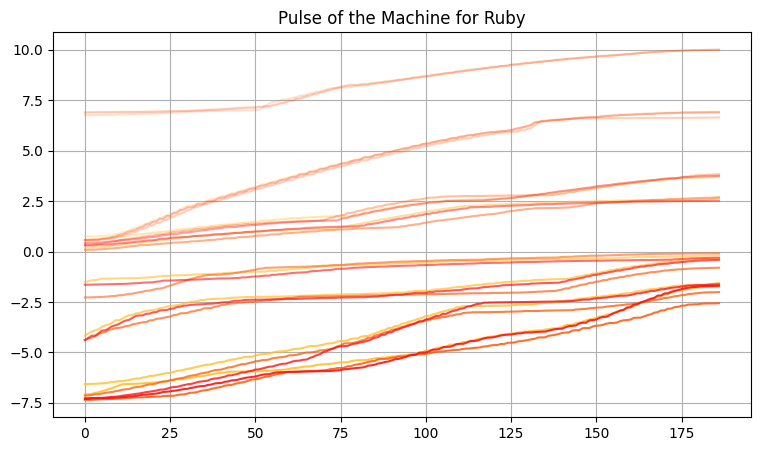

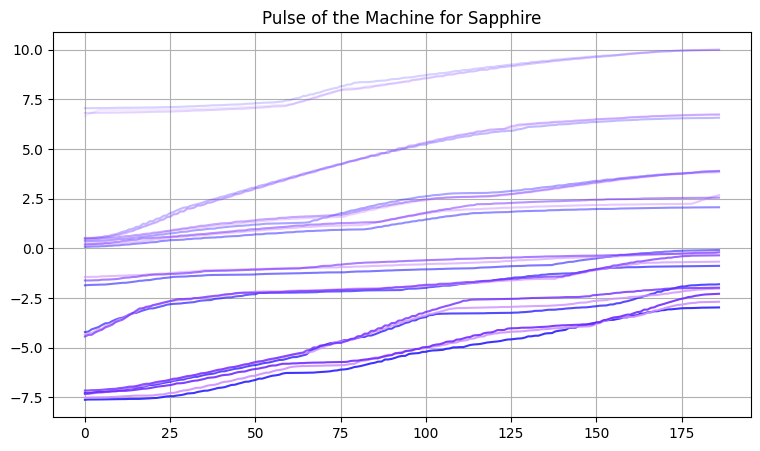

In [ ]:
cpy=feature_set_normalize(X_test)
multy_vis_col([cpy[2], cpy[3], cpy[7]], 'r')
multy_vis_col([cpy[0], cpy[1], cpy[4]], 'b')

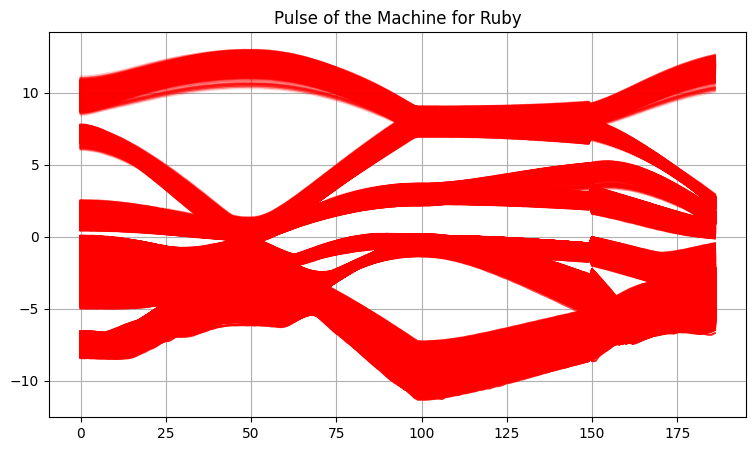

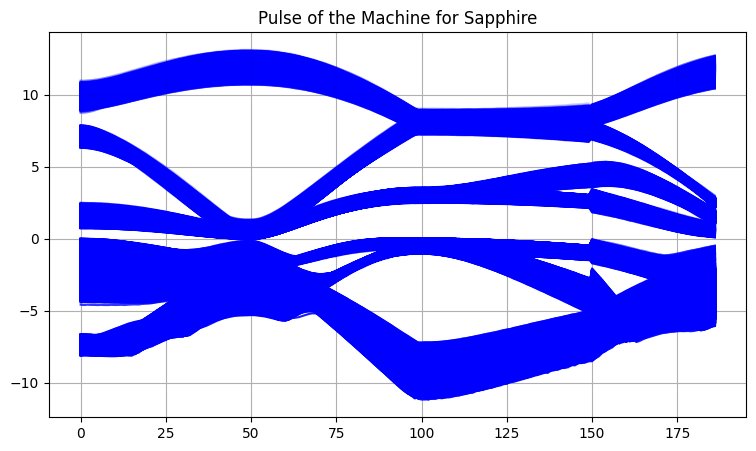

In [ ]:
cpy=feature_set_normalize_untime(X_train)
vis_all_changed(cpy)

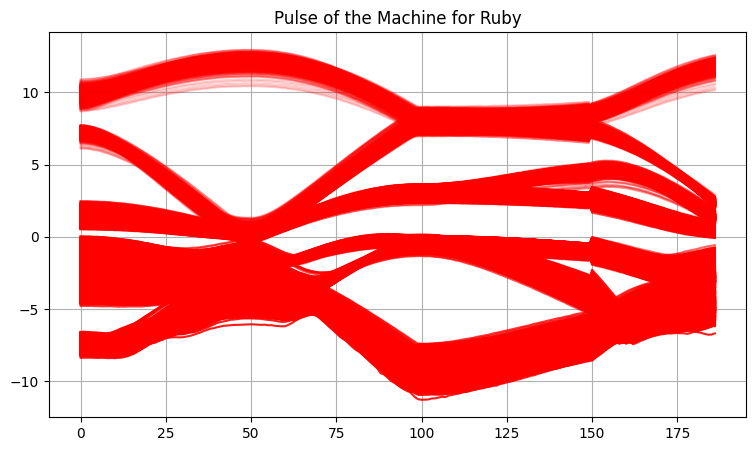

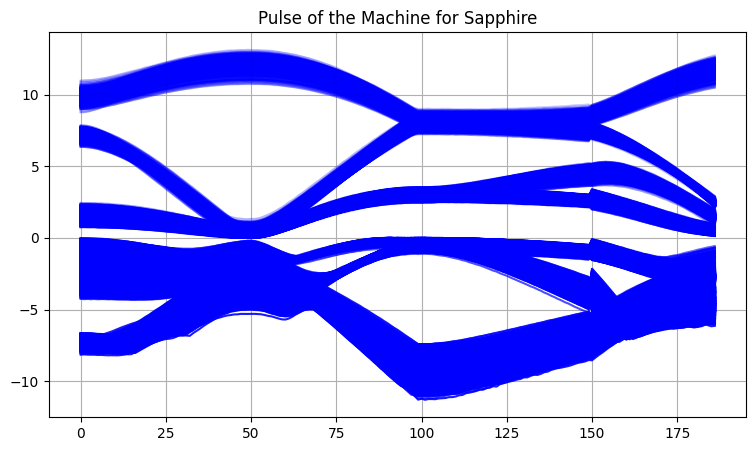

In [ ]:
cpy=feature_set_normalize_untime(X_test)
vis_all_changed_test(cpy)

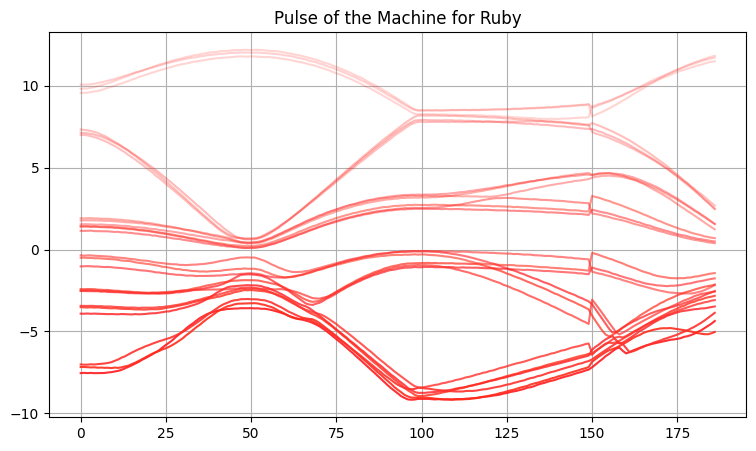

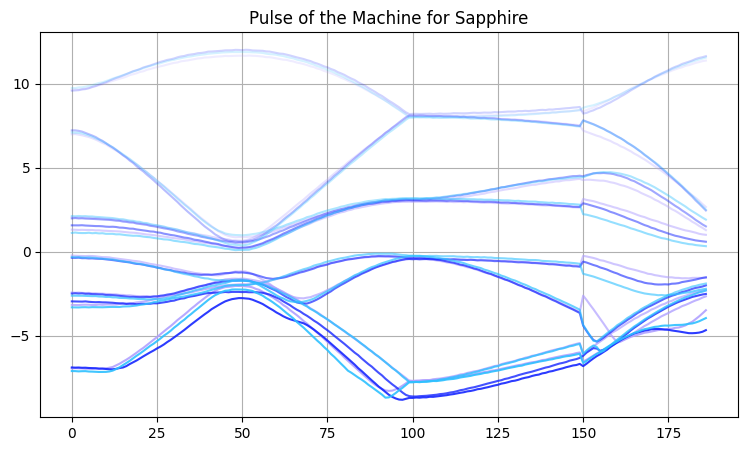

In [ ]:
cpy=feature_set_normalize_untime(X_train)
multy_vis_col([cpy[0], cpy[1], cpy[3]], 'r')
multy_vis_col([cpy[2], cpy[4], cpy[5]], 'b')

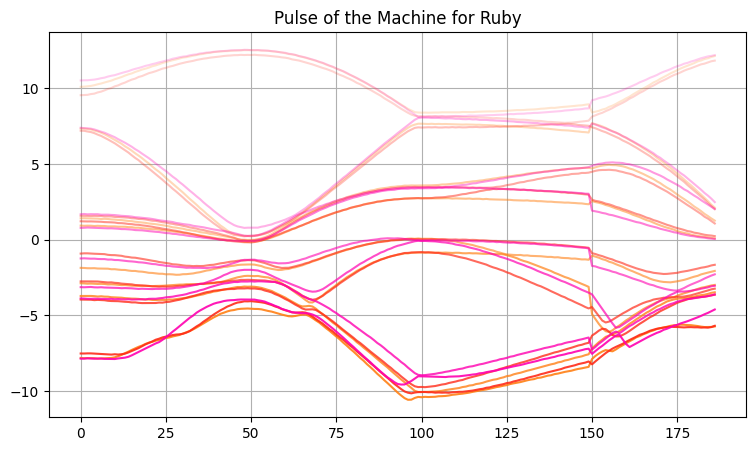

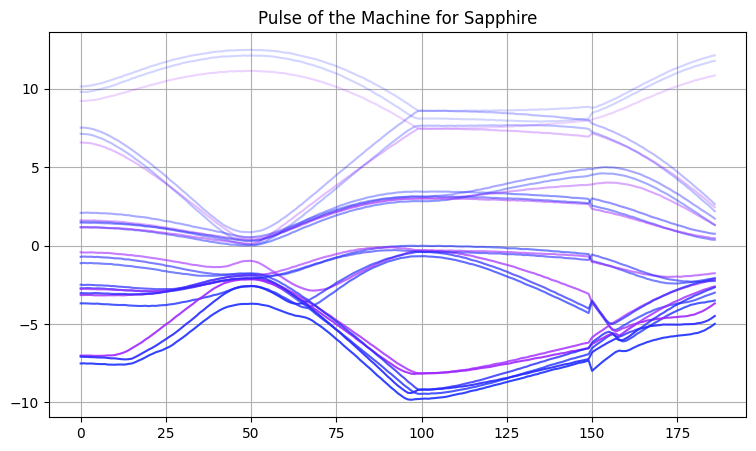

In [ ]:
cpy=feature_set_normalize_untime(X_test)
multy_vis_col([cpy[2], cpy[3], cpy[7]], 'r')
multy_vis_col([cpy[0], cpy[1], cpy[4]], 'b')

Everything looks similar as it should (this checking method isn't very safe because it uses the y_test that the model generates, but it's better than nothing). The last thing that we want to check is how similar are results of efficient and super duper efficient models are.

In [ ]:
def get_preds_efficient(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = [True if x else False
           for x in model.predict(test_features)]
  return preds

def get_preds_super_duper_efficient(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = [True if x else False
           for x in model.predict(test_features)]
  return preds

In [ ]:
y_val_efficient_preds=get_preds_efficient(
    your_feature_set_efficient(X_train),
    your_feature_set_efficient(X_val)
)
y_val_super_duper_efficient_preds=get_preds_super_duper_efficient(
    your_feature_set_super_duper_efficient(X_train),
    your_feature_set_super_duper_efficient(X_val)
)
y_test_efficient_preds=get_preds_efficient(
    your_feature_set_efficient(X_train),
    your_feature_set_efficient(X_test)
)
y_test_super_duper_efficient_preds=get_preds_super_duper_efficient(
    your_feature_set_super_duper_efficient(X_train),
    your_feature_set_super_duper_efficient(X_test)
)

In [ ]:
val_different=0
test_different=0
for i in range(len(y_val_efficient_preds)):
  if (y_val_efficient_preds[i]!=y_val_super_duper_efficient_preds[i]):
    val_different+=1
for i in range(len(y_test_efficient_preds)):
  if (y_test_efficient_preds[i]!=y_test_super_duper_efficient_preds[i]):
    test_different+=1
print("validation:",val_different/len(y_val_efficient_preds))
print("test:",test_different/len(y_test_efficient_preds))

validation: 0.04189560439560439
test: 0.04298418972332016


The numbers are almost the same so everything is fine and we can assume that our solutions will get similar results to those that they have on the validation set.